# Methylation of Genomic Features

In [2]:
library(tidyverse)
library(dplyr)
library(stringr)
library(rtracklayer)
library(tibble)

library(ggvenn)

# Methylation of CpG dinucleotides

generating a counts matrix with `bedtools multicov`, counting methylRAD seqs that match to a CpG dinucleotide in the *C. virginica* genome. Each column of numbers represents one individual oyster

In [7]:
!CG_motif="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"

!input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences"

!output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/CG_coverage/"

ERROR: Error: object 'CG_motif' not found


In [ ]:
!bedtools multicov -bams *.bam -bed $CG_motif > ${output_dir}CG_coverage.csv

**03/20/2025 troubleshooting** - re-running `bedtools multicov` on ~freshly~ downloaded CG motif bed file from NCBI ([found here](https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/022/765/GCF_002022765.2_C_virginica-3.0/GCF_002022765.2_C_virginica-3.0_assembly_structure/))

runs as job script in bash

In [ ]:
cd /project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences

output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/"

CG_motif="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"

bedtools multicov -bams *.bam -bed $CG_motif > ${output_dir}CG_motif_multicov.csv

# Methylation level 
Determining the methylation level of CpG dinucleotides and gene regions. To do this, I'm going to use `bedtools multicov` to generate coverage files for each sample with bed files of the different gene features. Then, calculate the number of features with methylation and number without to get our methylation level.

In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"

definining which individual oysters belong to each treatment (there are 5 replicate oysters per unique combo)

In [ ]:
# hypoxic control
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

# control hypoxic
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

# hypoxic hypoxic 
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

# control control
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam") 


# CpG dinucleotides
Generated at top of the script

In [66]:
CG_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CG_motif_multicov.csv', sep='\t')
dim(CG_multicov)
head(CG_multicov)

[1] 14458702       24

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4,X0.5,⋯,X0.10,X0.11,X0.12,X0.13,X0.14,X0.15,X0.16,X0.17,X0.18,X0.19
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [67]:
# getting names of the BAM files for each oyster individual
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)
bam_files

[1] "2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam"
 [3] "2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam"
 [5] "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam"
 [7] "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam"
 [9] "2018--BBR-BBY-B26-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam"
[11] "2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-BBB-W56-CV_sorted.bam"
[13] "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam"
[15] "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam"
[17] "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam"
[19] "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam"

In [68]:
# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

In [69]:
# renaming columns with sample name - based on order that appears in the directory
colnames(CG_multicov) <- c('chromosome', 'start', 'stop', 'CG_motif', bam_files_clean)
head(CG_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Below, I am creating new CSV files that are exactly what is above, but separated by their treatment - so each file will contain the 'base info' (chromosome, start, stop, CG_motif) and then the 5 oyster replicates with their matching methylRAD seqs

In [70]:
# Base columns
base_cols <- CG_multicov[, c("chromosome", "start", "stop", "CG_motif")]

########################################################################
## HYPOXIC CONTROL

# Additional columns matching pattern
HC_cols <- CG_multicov[, grepl("BB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HC_multicov <- cbind(base_cols, HC_cols)

write.csv(HC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv")

########################################################################
## HYPOXIC HYPOXIC

# Additional columns matching pattern
HH_cols <- CG_multicov[, grepl("BB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HH_multicov <- cbind(base_cols, HH_cols)

write.csv(HH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv")

########################################################################
## CONTROL HYPOXIC

# Additional columns matching pattern
CH_cols <- CG_multicov[, grepl("WB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CH_multicov <- cbind(base_cols, CH_cols)

write.csv(CH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv")

########################################################################
# CONTROL CONTROL

# Additional columns matching pattern
CC_cols <- CG_multicov[, grepl("WB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CC_multicov <- cbind(base_cols, CC_cols)

write.csv(CC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv")

########################################################################
head(HC_multicov)
head(HH_multicov)
head(CH_multicov)
head(CC_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


## Calculating methylation level of CpGs by sample

General pipeline:
1. Grab the 5 columns for each replicate in the 'big' data frame
2. Only keep the CpGs that have at least 5 sequences for that replicate (choosing 5 based on 5x coverage used in Ventakamaran et al 2022) - calculate how many rows are kept 
3. Calculate methylation level based on this calculation: (methylated CpGs/total CpGs)x100

IF ALREADY RAN CODE ONCE, skip to bottom and load CSV

**control control**

In [12]:
CC_multicov <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv")
head(CC_multicov)

,X,chromosome,start,stop,CG_motif,WBB.WBV.W69,WBG.WBG.W44,WBO.WBV.W64,WBV.WBO.W23,WBV.WBR.W12
,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


In [13]:
CCsample_columns <- CC_multicov[, 6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_cc <- colSums(CCsample_columns >= 5)

# Print the result
ML_cc

WBB.WBV.W69 WBG.WBG.W44 WBO.WBV.W64 WBV.WBO.W23 WBV.WBR.W12 
     147798       59287      137931       81789       33975

In [14]:
# total number of CpG dinucleotides 
total_cg <- dim(CC_multicov)[1]
total_cg

[1] 14458702

In [15]:
CCml_cpg <- ML_cc %>%
  as.data.frame() %>% # create df
  rownames_to_column("sampleID") %>% # add col for sample IDs
  mutate(treatment = "CC") %>% # add treatment info for merging
  `colnames<-`(., c("sampleID", "methyl_count", "treatment")) %>% # rename columns
  mutate(sampleID = gsub("\\.", "", sampleID)) # remove . in sample IDs

CCml_cpg

sampleID,methyl_count,treatment
<chr>,<dbl>,<chr>
WBBWBVW69,147798,CC
WBGWBGW44,59287,CC
WBOWBVW64,137931,CC
WBVWBOW23,81789,CC
WBVWBRW12,33975,CC


In [16]:
# calculate methylation level
CCml_cpg$methyl_level <- round(((CCml_cpg$methyl_count/total_cg)*100),3)

# reorder columns to make sense
#CCml_cpg <- select(CCml_cpg, treatment, replicate, methyl_count, methyl_level)

CCml_cpg

sampleID,methyl_count,treatment,methyl_level
<chr>,<dbl>,<chr>,<dbl>
WBBWBVW69,147798,CC,1.022
WBGWBGW44,59287,CC,0.410
WBOWBVW64,137931,CC,0.954
WBVWBOW23,81789,CC,0.566
WBVWBRW12,33975,CC,0.235


**control hypoxic**

In [17]:
CH_multicov <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv")
head(CH_multicov)

,X,chromosome,start,stop,CG_motif,WBG.BBB.W56,WBO.BBR.W03,WBR.BBY.W25,WBY.BBV.W65,WBY.BBY.W30
,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


In [18]:
CHsample_columns <- CH_multicov[,6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_ch <- colSums(CHsample_columns >= 5)

# Print the result
ML_ch

WBG.BBB.W56 WBO.BBR.W03 WBR.BBY.W25 WBY.BBV.W65 WBY.BBY.W30 
     140077       24101       73538      136233      104170

In [19]:
CHml_cpg <- ML_ch %>%
  as.data.frame() %>% # create df
  rownames_to_column("sampleID") %>% # add col for sample IDs
  mutate(treatment = "CH") %>% # add treatment info for merging
  `colnames<-`(., c("sampleID", "methyl_count", "treatment")) %>% # rename columns
  mutate(sampleID = gsub("\\.", "", sampleID)) # remove . in sample IDs

CHml_cpg

sampleID,methyl_count,treatment
<chr>,<dbl>,<chr>
WBGBBBW56,140077,CH
WBOBBRW03,24101,CH
WBRBBYW25,73538,CH
WBYBBVW65,136233,CH
WBYBBYW30,104170,CH


In [20]:
# calculate methylation level
CHml_cpg$methyl_level <- round(((CHml_cpg$methyl_count/total_cg)*100),3)

CHml_cpg

sampleID,methyl_count,treatment,methyl_level
<chr>,<dbl>,<chr>,<dbl>
WBGBBBW56,140077,CH,0.969
WBOBBRW03,24101,CH,0.167
WBRBBYW25,73538,CH,0.509
WBYBBVW65,136233,CH,0.942
WBYBBYW30,104170,CH,0.720


**hypoxic hypoxic**

In [21]:
HH_multicov <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv")

In [23]:
HHsample_columns <- HH_multicov[,6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hh <- colSums(HHsample_columns >= 5)

# Print the result
ML_hh

BBO.BBO.B16 BBO.BBY.B27 BBR.BBB.B50 BBR.BBG.B38 BBR.BBY.B26 
     132674      105032      104681      134384      129732

In [24]:
HHml_cpg <- ML_hh %>%
  as.data.frame() %>% # create df
  rownames_to_column("sampleID") %>% # add col for sample IDs
  mutate(treatment = "HH") %>% # add treatment info for merging
  `colnames<-`(., c("sampleID", "methyl_count", "treatment")) %>% # rename columns
  mutate(sampleID = gsub("\\.", "", sampleID)) # remove . in sample IDs

HHml_cpg

sampleID,methyl_count,treatment
<chr>,<dbl>,<chr>
BBOBBOB16,132674,HH
BBOBBYB27,105032,HH
BBRBBBB50,104681,HH
BBRBBGB38,134384,HH
BBRBBYB26,129732,HH


In [25]:
# calculate methylation level
HHml_cpg$methyl_level <- round(((HHml_cpg$methyl_count/total_cg)*100),3)

HHml_cpg

sampleID,methyl_count,treatment,methyl_level
<chr>,<dbl>,<chr>,<dbl>
BBOBBOB16,132674,HH,0.918
BBOBBYB27,105032,HH,0.726
BBRBBBB50,104681,HH,0.724
BBRBBGB38,134384,HH,0.929
BBRBBYB26,129732,HH,0.897


**hypoxic control**

In [26]:
HC_multicov <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv")

In [27]:
HCsample_columns <- HC_multicov[, 6:10] # Select the sample columns

# Calculate the number of rows with at least 5 for each sample
ML_hc <- colSums(HCsample_columns >= 5)

# Print the result
ML_hc

BBB.WBO.B21 BBB.WBV.B70 BBO.WBO.B16 BBO.WBV.B64 BBY.WBG.B42 
     138394      136261      149013      136293       67842

In [28]:
HCml_cpg <- ML_hc %>%
  as.data.frame() %>% # create df
  rownames_to_column("sampleID") %>% # add col for sample IDs
  mutate(treatment = "HC") %>% # add treatment info for merging
  `colnames<-`(., c("sampleID", "methyl_count", "treatment")) %>% # rename columns
  mutate(sampleID = gsub("\\.", "", sampleID)) # remove . in sample IDs

HCml_cpg

sampleID,methyl_count,treatment
<chr>,<dbl>,<chr>
BBBWBOB21,138394,HC
BBBWBVB70,136261,HC
BBOWBOB16,149013,HC
BBOWBVB64,136293,HC
BBYWBGB42,67842,HC


In [29]:
# calculate methylation level
HCml_cpg$methyl_level <- round(((HCml_cpg$methyl_count/total_cg)*100),2)

HCml_cpg

sampleID,methyl_count,treatment,methyl_level
<chr>,<dbl>,<chr>,<dbl>
BBBWBOB21,138394,HC,0.96
BBBWBVB70,136261,HC,0.94
BBOWBOB16,149013,HC,1.03
BBOWBVB64,136293,HC,0.94
BBYWBGB42,67842,HC,0.47


In [30]:
cg_meLevel <- rbind(CCml_cpg, CHml_cpg, HCml_cpg, HHml_cpg)
cg_meLevel

sampleID,methyl_count,treatment,methyl_level
<chr>,<dbl>,<chr>,<dbl>
WBBWBVW69,147798,CC,1.022
WBGWBGW44,59287,CC,0.410
WBOWBVW64,137931,CC,0.954
WBVWBOW23,81789,CC,0.566
WBVWBRW12,33975,CC,0.235
WBGBBBW56,140077,CH,0.969
WBOBBRW03,24101,CH,0.167
WBRBBYW25,73538,CH,0.509
WBYBBVW65,136233,CH,0.942


In [31]:
# create csv to avoid running long code above
write.csv(cg_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel_withSampleNames.csv')

**IF ALREADY RAN ABOVE CODE** just load in csv:

In [3]:
cg_meLevel <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


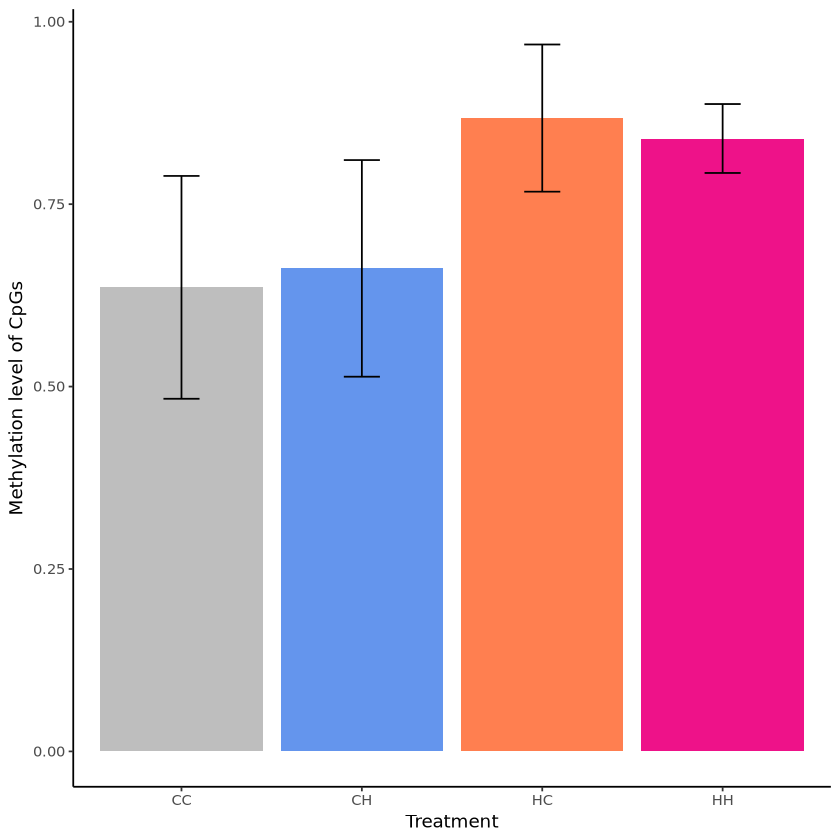

In [7]:
df_summary <- cg_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  )

# Create a bar plot with error bars
cpgMe_barplot <- ggplot(df_summary, aes(x = treatment, y = mean_methyl_level, fill = treatment)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill = FALSE) +
  labs(x = "Treatment", y = "Methylation level of CpGs") +
  theme_classic()

cpgMe_barplot

In [128]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_barplot.pdf', cpgMe_barplot)

Saving 6.67 x 6.67 in image


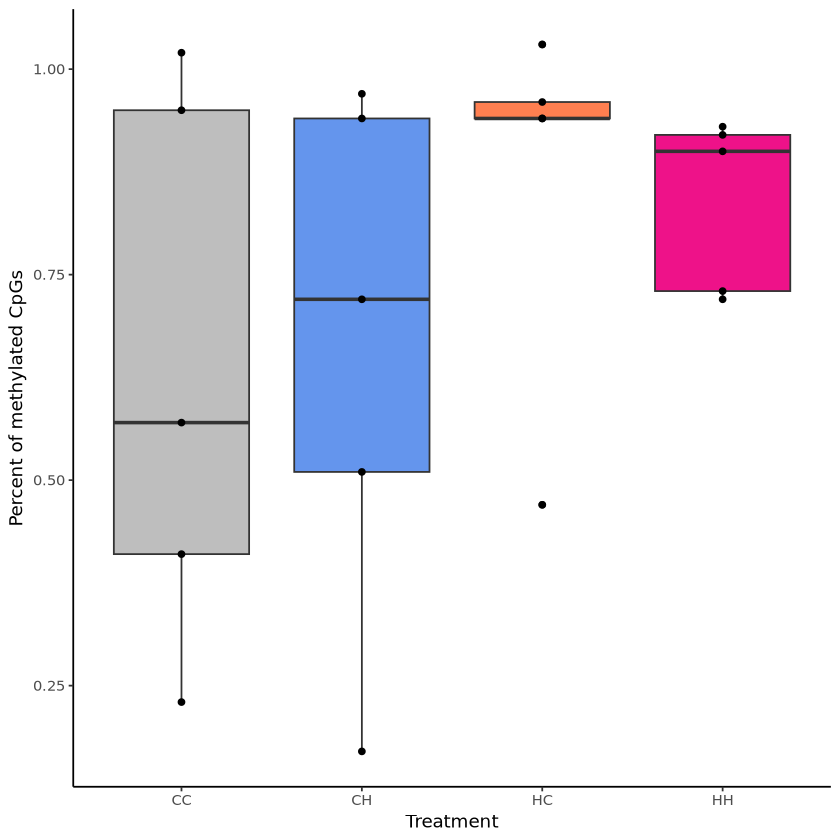

In [8]:
cpgMe_boxplot <- ggplot(cg_meLevel, aes(x = treatment, y = methyl_level, fill = treatment)) +
  geom_boxplot() +
geom_point() +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('gray', 'cornflowerblue', 'coral','deeppink2')) +
guides(fill=FALSE) +
  labs(x = "Treatment", y = "Percent of methylated CpGs") +
  theme_classic()

cpgMe_boxplot

In [45]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_boxplot.pdf', cpgMe_boxplot)

Saving 6.67 x 6.67 in image


(see below for plot used for figure)

### ANOVA of CpG methylation
want to know if the differences in CpG methylation between treatments is statistically significant

following pipeline [here](https://www.sthda.com/english/wiki/one-way-anova-test-in-r)

In [89]:
# make copy of df
cpg <- cg_meLevel

# set levels
cpg$treatment <- ordered(cpg$treatment,
                           levels = c('CC', 'CH', 'HC', 'HH'))

levels(cpg$treatment)

[1] "CC" "CH" "HC" "HH"

In [90]:
# summary statistics
group_by(cpg, treatment) %>%
summarise(count = n(),
          mean = mean(methyl_level, na.rm=TRUE),
          sd = sd(methyl_level, na.rm=TRUE)
          )

treatment,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
CC,5,0.636,0.3414381
CH,5,0.662,0.3319187
HC,5,0.868,0.2255438
HH,5,0.840,0.1055936


In [91]:
res.aov <- aov(methyl_level ~ treatment, data = cpg)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
treatment    3 0.2138 0.07126   0.987  0.424
Residuals   16 1.1551 0.07219               

In [92]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ treatment, data = cpg)

$treatment
        diff        lwr       upr     p adj
CH-CC  0.026 -0.4601798 0.5121798 0.9986682
HC-CC  0.232 -0.2541798 0.7181798 0.5374580
HH-CC  0.204 -0.2821798 0.6901798 0.6353007
HC-CH  0.206 -0.2801798 0.6921798 0.6282900
HH-CH  0.178 -0.3081798 0.6641798 0.7248713
HH-HC -0.028 -0.5141798 0.4581798 0.9983394


**check the homogeneity of variance assumption**

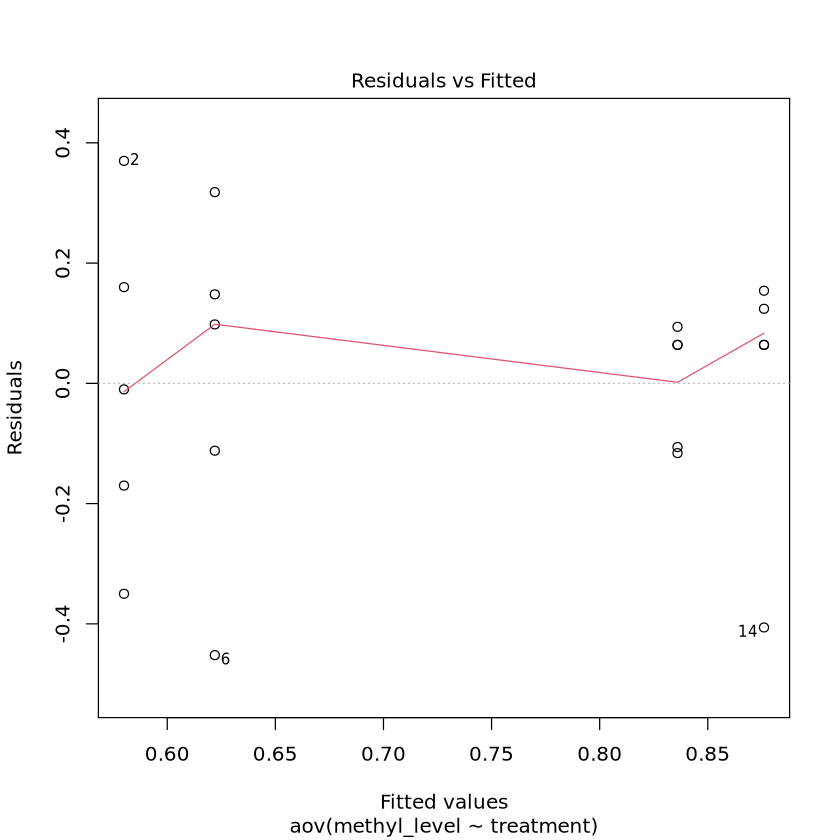

In [136]:
plot(res.aov,1)

In [137]:
leveneTest(methyl_level ~ treatment, data = cpg)

ERROR: Error in leveneTest(methyl_level ~ treatment, data = cpg): could not find function "leveneTest"


from [source](https://www.sthda.com/english/wiki/one-way-anova-test-in-r): "...the p-value is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. Therefore, we can assume the homogeneity of variances in the different treatment groups."

**check the normality assumption**

In [ ]:
plot(res.aov, 2)

# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

so no statistically significant differences of methlyation levels for CpG dinucleotides between treatments

#### fixing ANOVA
after talking to SGW 12/5 - need to split phase 1 and 2 and look at the interaction of the two - bc some oysters experienced the same treatment in either phase 1 or 2

### two-way ANOVA of CpG methylation

In [162]:
cpg <- cg_meLevel
head(cpg)

,methyl_count,replicate,treatment,methyl_level
,<dbl>,<dbl>,<chr>,<dbl>
1,147798,1,CC,1.022
2,59287,2,CC,0.410
3,137931,3,CC,0.954
4,81789,4,CC,0.566
5,33975,5,CC,0.235
6,140077,1,CH,0.969


In [163]:
# for loop to assign phase 1 and phase 2 treatments based on the treatment column
cpg <- cpg %>%
  mutate(phase1 = ifelse(str_sub(treatment, 1, 1) == "C", "control", "hypoxia"),
         phase2 = ifelse(str_sub(treatment, 2, 2) == "H", "hypoxia", "control"))

cpg

methyl_count,replicate,treatment,methyl_level,phase1,phase2
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
147798,1,CC,1.022,control,control
59287,2,CC,0.410,control,control
137931,3,CC,0.954,control,control
81789,4,CC,0.566,control,control
33975,5,CC,0.235,control,control
140077,1,CH,0.969,control,hypoxia
24101,2,CH,0.167,control,hypoxia
73538,3,CH,0.509,control,hypoxia
136233,4,CH,0.942,control,hypoxia


In [81]:
# running a two-way ANOVA
model <- aov(methyl_level ~ phase1 * phase2, data = cg_meLevel)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)
phase1         1 0.2081 0.20808   2.874  0.109
phase2         1 0.0000 0.00003   0.000  0.983
phase1:phase2  1 0.0035 0.00354   0.049  0.828
Residuals     16 1.1585 0.07241               

#### **Tukey Honestly Significant Difference (HSD)** post hoc test 
compares the means of multiple groups

In [171]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = methyl_level ~ phase1 * phase2, data = cpg)

$phase1
                 diff         lwr       upr     p adj
hypoxia-control 0.204 -0.05110653 0.4591065 0.1094039

$phase2
                   diff        lwr       upr     p adj
hypoxia-control -0.0026 -0.2577065 0.2525065 0.9830296

$`phase1:phase2`
                                   diff        lwr       upr     p adj
hypoxia:control-control:control  0.2306 -0.2563014 0.7175014 0.5434766
control:hypoxia-control:control  0.0240 -0.4629014 0.5109014 0.9989556
hypoxia:hypoxia-control:control  0.2014 -0.2855014 0.6883014 0.6454466
control:hypoxia-hypoxia:control -0.2066 -0.6935014 0.2803014 0.6272595
hypoxia:hypoxia-hypoxia:control -0.0292 -0.5161014 0.4577014 0.9981269
hypoxia:hypoxia-control:hypoxia  0.1774 -0.3095014 0.6643014 0.7277601


**main effects:**
- phase 1 hypoxia has significantly higher methylation levels than phase 1 control
- no main effect from phase 2

**interaction effects**
- no interaction effects


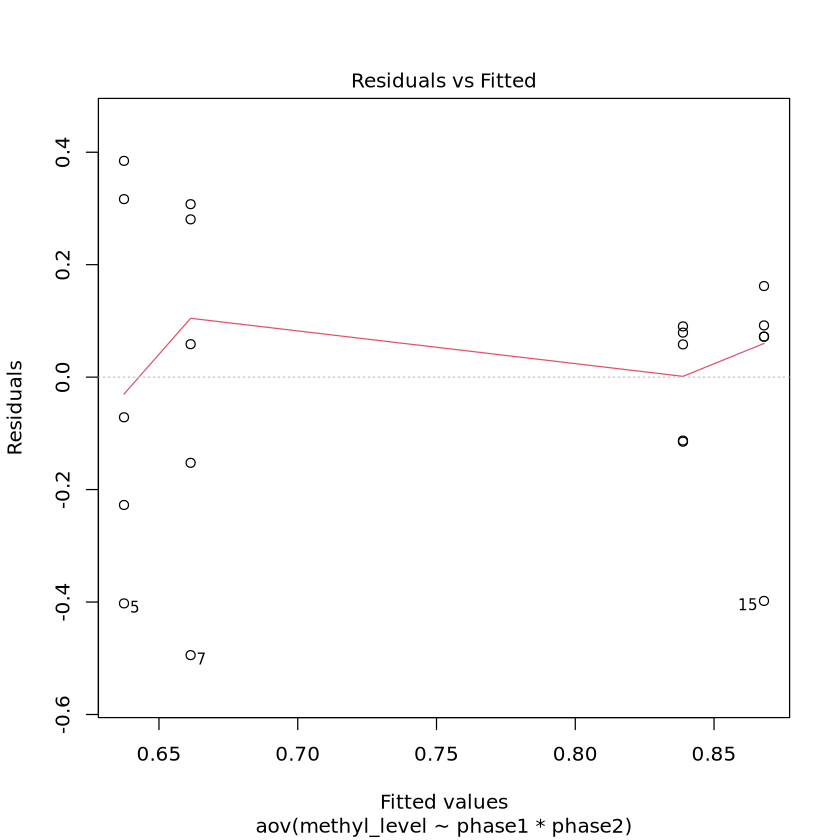

In [172]:
plot(model,1)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.94512, p-value = 0.299


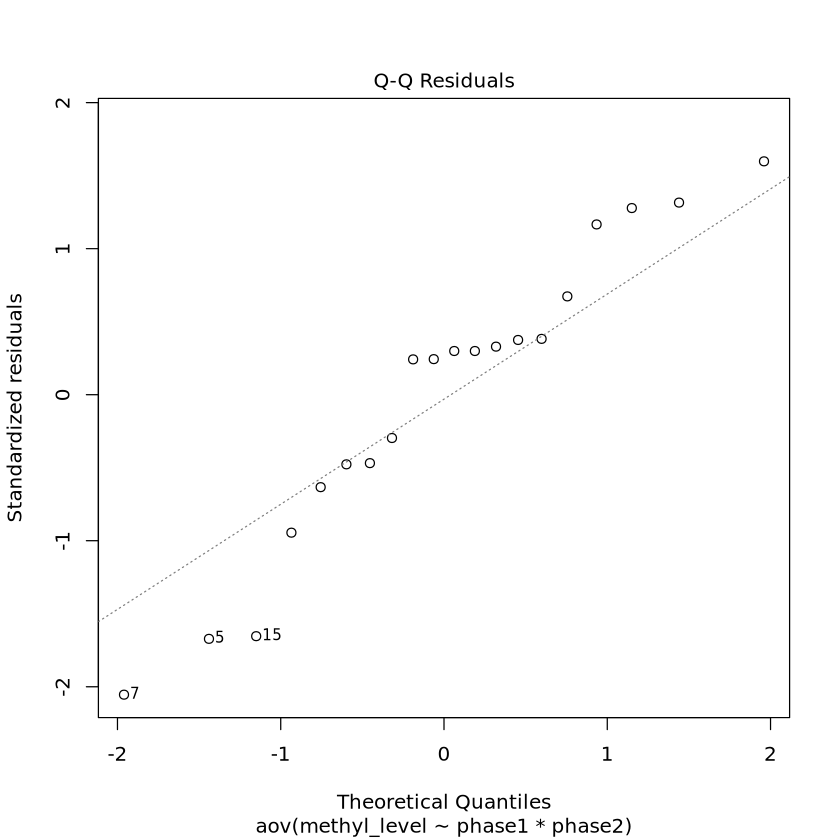

In [173]:
plot(model, 2)

# Extract the residuals
aov_residuals <- residuals(object = model )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )

# CpG methylation boxplot but faceted by second exposure

In [21]:
cpg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel.csv')
cpg <- cpg[,-1]
cpg

methyl_count,treatment,methyl_level,phase1,phase2
<int>,<chr>,<dbl>,<chr>,<chr>
147798,CC,1.02,Control,Control
59287,CC,0.41,Control,Control
137931,CC,0.95,Control,Control
81789,CC,0.57,Control,Control
33975,CC,0.23,Control,Control
138394,HC,0.96,Hypoxic,Control
136261,HC,0.94,Hypoxic,Control
149013,HC,1.03,Hypoxic,Control
136293,HC,0.94,Hypoxic,Control


In [4]:
# Assuming your data is in a dataframe called 'df'
cg_meLevel$phase1 <- ifelse(substr(cg_meLevel$treatment, 1, 1) == "C", "Control", "Hypoxic")
cg_meLevel$phase2 <- ifelse(substr(cg_meLevel$treatment, 2, 2) == "C", "Control", "Hypoxic")

cg_meLevel

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'substr': object 'cg_meLevel' not found


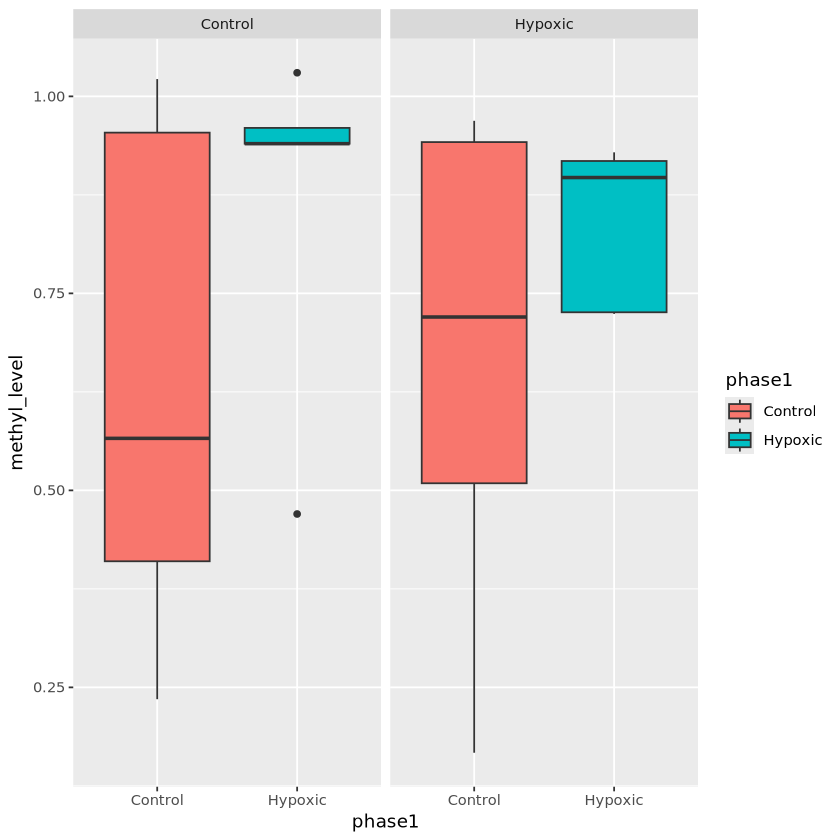

In [65]:
ggplot(cg_meLevel, aes(x = phase1, y = methyl_level, fill = phase1)) +
geom_boxplot() + 
facet_wrap(~phase2)

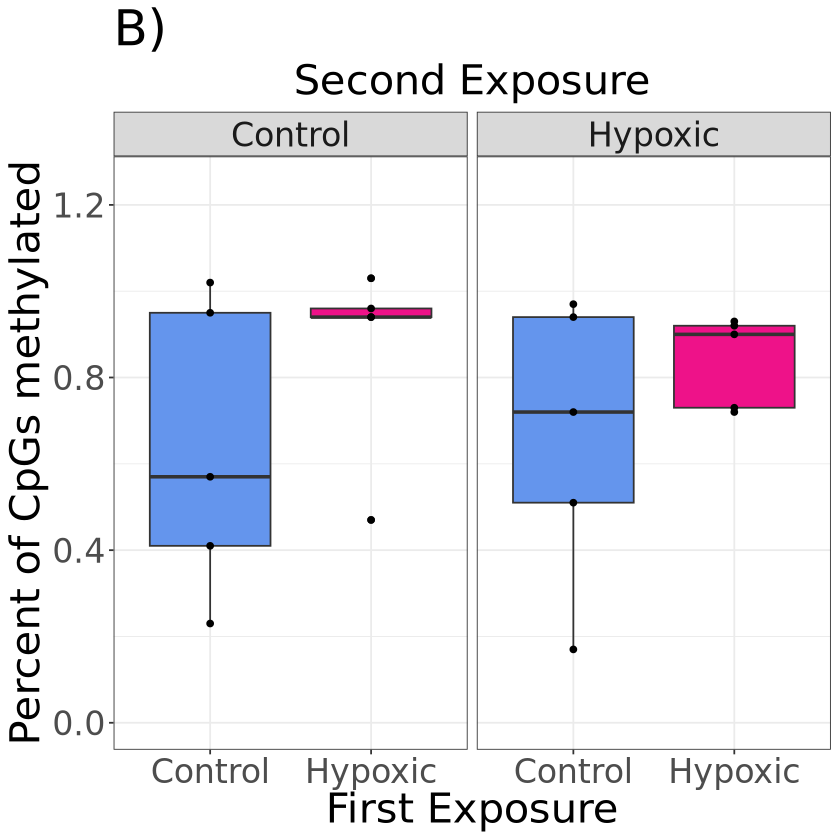

In [18]:
cpgBoxplot <- ggplot(cpg, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = 'none') +
ylim(0, 1.25) +
  labs(x = "First Exposure", 
       y = "Percent of CpGs methylated",
       title = 'B)',
       subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 25), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

In [20]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/cpgMe_boxplot_faceted.pdf', cpgBoxplot,  width=7.5, height=10)

reordering df and saving for future use

In [34]:
cg_meLevel <- select(cg_meLevel, sampleID, treatment, phase1, phase2, methyl_count, methyl_level)

cg_meLevel

sampleID,treatment,phase1,phase2,methyl_count,methyl_level
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
WBBWBVW69,CC,Control,Control,147798,1.022
WBGWBGW44,CC,Control,Control,59287,0.410
WBOWBVW64,CC,Control,Control,137931,0.954
WBVWBOW23,CC,Control,Control,81789,0.566
WBVWBRW12,CC,Control,Control,33975,0.235
WBGBBBW56,CH,Control,Hypoxic,140077,0.969
WBOBBRW03,CH,Control,Hypoxic,24101,0.167
WBRBBYW25,CH,Control,Hypoxic,73538,0.509
WBYBBVW65,CH,Control,Hypoxic,136233,0.942


In [35]:
write.csv(cg_meLevel, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/CpG_meLevel_withSampleNames.csv', row.names=FALSE)

Adding growth info

In [43]:
growth <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/growth_methylation.csv')

growth <- growth[,(7:34)]

head(growth)

,sample,phase1_rep,phase2_rep,tag,methylation.,X16s.,tag2,combined,Oyster.Code,Phase.1.DO.Treatment,⋯,Final.Dry.Mass..g.,Initial.Shell.Mass..g.,Initial.Tissue.Mass..g.,Final.Shell.Mass..g.,Final.Tissue.Mass..g.,Shell.Growth..g.,Shell.Growth..mg.,Tissue.Growth..g.,Tissue.Growth..mg.,Tissue.Shell.Growth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018--WBB-WBV-W69-CV,WBB,WBV,W69,yes,no,69W,WBBWBV69W,69W,Normoxic,⋯,0.2334,0.1467761,0.05142390,0.1691075,0.06429250,0.02233140,22.33140,0.01286860,12.86860,0.5762559
2,2018--WBG-WBG-W44-CV,WBG,WBG,W44,yes,no,44W,WBGWBG44W,44W,Normoxic,⋯,0.5151,0.2963678,0.11763215,0.3749572,0.14014280,0.07858935,78.58935,0.02251065,22.51065,0.2864338
3,2018--WBO-WBV-W64-CV,WBO,WBV,W64,yes,no,64W,WBOWBV64W,64W,Normoxic,⋯,0.2627,0.1583712,0.04752875,0.2031772,0.05952280,0.04480595,44.80595,0.01199405,11.99405,0.2676888
4,2018--WBV-WBO-W23-CV,WBV,WBO,W23,yes,no,23W,WBVWBO23W,23W,Normoxic,⋯,0.2849,0.1914389,0.06426110,0.2130546,0.07184545,0.02161565,21.61565,0.00758435,7.58435,0.3508731
5,2018--WBV-WBR-W12-CV,WBV,WBR,W12,yes,no,12W,WBVWBR12W,12W,Normoxic,⋯,0.1744,0.1141379,0.02196210,0.1404775,0.03392250,0.02633960,26.33960,0.01196040,11.96040,0.4540844
6,2018--WBG-BBB-W56-CV,WBG,BBB,W56,yes,yes,56W,WBGBBB56W,56W,Normoxic,⋯,0.5996,0.3254273,0.15177270,0.4031577,0.19644225,0.07773045,77.73045,0.04466955,44.66955,0.5746725


In [55]:
colnames(cg_meLevel)[1] <- "combined"

In [58]:
head(cg_meLevel)

,combined,treatment,phase1,phase2,methyl_count,methyl_level
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,WBBWBVW69,CC,Control,Control,147798,1.022
2,WBGWBGW44,CC,Control,Control,59287,0.410
3,WBOWBVW64,CC,Control,Control,137931,0.954
4,WBVWBOW23,CC,Control,Control,81789,0.566
5,WBVWBRW12,CC,Control,Control,33975,0.235
6,WBGBBBW56,CH,Control,Hypoxic,140077,0.969


In [67]:
growth$combined <- paste(growth$phase1_rep, growth$phase2_rep, growth$tag, sep='')

In [74]:
growth_me <- merge(cg_meLevel, growth, by = 'combined')
head(growth_me)

,combined,treatment,phase1,phase2,methyl_count,methyl_level,sample,phase1_rep,phase2_rep,tag,⋯,Final.Dry.Mass..g.,Initial.Shell.Mass..g.,Initial.Tissue.Mass..g.,Final.Shell.Mass..g.,Final.Tissue.Mass..g.,Shell.Growth..g.,Shell.Growth..mg.,Tissue.Growth..g.,Tissue.Growth..mg.,Tissue.Shell.Growth
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,BBBWBOB21,HC,Hypoxic,Control,138394,0.960,2018--BBB-WBO-B21-CV,BBB,WBO,B21,⋯,0.3187,0.20360665,0.07299335,0.2386784,0.08002160,0.03507175,35.07175,0.00702825,7.02825,0.2003963
2,BBBWBVB70,HC,Hypoxic,Control,136261,0.940,2018--BBB-WBV-B70-CV,BBB,WBV,B70,⋯,0.3176,0.20704225,0.11495775,0.2037498,0.11385020,-0.00329250,-3.29245,-0.00110760,-1.10755,0.3363908
3,BBOBBOB16,HH,Hypoxic,Hypoxic,132674,0.918,2018--BBO-BBO-B16-CV,BBO,BBO,B16,⋯,0.1332,0.09653045,0.02076955,0.1104160,0.02278400,0.01388555,13.88555,0.00201445,2.01445,0.1450753
4,BBOBBYB27,HH,Hypoxic,Hypoxic,105032,0.726,2018--BBO-BBY-B27-CV,BBO,BBY,B27,⋯,0.5593,0.30681780,0.15978220,0.3710922,0.18820785,0.06427435,64.27435,0.02842565,28.42565,0.4422550
5,BBOWBOB16,HC,Hypoxic,Control,149013,1.030,2018--BBO-WBO-B16-CV,BBO,WBO,B16,⋯,0.3113,0.21577440,0.05172560,0.2522777,0.05902235,0.03650325,36.50325,0.00729675,7.29675,0.1998932
6,BBOWBVB64,HC,Hypoxic,Control,136293,0.940,2018--BBO-WBV-B64-CV,BBO,WBV,B64,⋯,0.3281,0.17769650,0.08260350,0.2255086,0.10259140,0.04781210,47.81210,0.01998790,19.98790,0.4180511


In [73]:
write.csv(growth_me, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/methylation_level/growth_methylation.csv')

## Summary statistics

when oysters are first exposed to control, what is the effect of the second exposure?

In [28]:
cc <- p1_c %>%
filter(phase2 == 'Control')

ch <- p1_c %>%
filter(phase2 == 'Hypoxic')

head(ch)

,methyl_count,treatment,methyl_level,phase1,phase2
,<int>,<chr>,<dbl>,<chr>,<chr>
1,140077,CH,0.97,Control,Hypoxic
2,24101,CH,0.17,Control,Hypoxic
3,73538,CH,0.51,Control,Hypoxic
4,136233,CH,0.94,Control,Hypoxic
5,104170,CH,0.72,Control,Hypoxic


In [26]:
t.test(cc$methyl_level, ch$methyl_level)


	Welch Two Sample t-test

data:  cc$methyl_level and ch$methyl_level
t = -0.12209, df = 7.9936, p-value = 0.9058
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5171443  0.4651443
sample estimates:
mean of x mean of y 
    0.636     0.662 


first exposure to hypoxia?

In [31]:
hc <- cpg %>%
filter(phase1 == 'Hypoxic' & phase2 == 'Control')

hh <- cpg %>%
filter(phase1 == 'Hypoxic' & phase2 == 'Hypoxic')

head(hh)

,methyl_count,treatment,methyl_level,phase1,phase2
,<int>,<chr>,<dbl>,<chr>,<chr>
1,132674,HH,0.92,Hypoxic,Hypoxic
2,105032,HH,0.73,Hypoxic,Hypoxic
3,104681,HH,0.72,Hypoxic,Hypoxic
4,134384,HH,0.93,Hypoxic,Hypoxic
5,129732,HH,0.90,Hypoxic,Hypoxic


In [32]:
t.test(hc$methyl_level, hh$methyl_level)


	Welch Two Sample t-test

data:  hc$methyl_level and hh$methyl_level
t = 0.25141, df = 5.6731, p-value = 0.8104
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2483726  0.3043726
sample estimates:
mean of x mean of y 
    0.868     0.840 
